In [22]:
import requests
import json
from geopy.geocoders import Nominatim
from collections import defaultdict
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Data Collection using API

In [ ]:
cities_list = ['Tokyo', 'Delhi','Shanghai','Sao Paulo','Mexico City','Cairo','Mumbai','Beijing','Dhaka',
               'Osaka','New York City','Karachi','Buenos Aires','Chongqing','Istanbul','Kolkata','Manila','Lagos',
               'Rio de Janeiro','Tianjin','Kinshasa','Guangzhou','Los Angeles','Moscow','Shenzhen','Lahore','Bangalore',
               'Paris','Bogota','Jakarta','Chennai','Lima','Bangkok','Seoul','Nagoya','Hyderabad',
               'London','Tehran','Chicago','Chengdu','Nanjing','Wuhan','Ho Chi Minh City','Luanda',
               'Ahmedabad','Kuala Lumpur','Xian','Hong Kong','Dongguan','Hangzhou','Foshan','Shenyang',
               'Riyadh','Baghdad','Santiago','Surat','Madrid','Suzhou','Pune','Harbin','Houston',
               'Dallas','Toronto','Dar es Salaam','Miami','Belo Horizonte','Singapore','Philadelphia','Atlanta','Fukuoka',
               'Khartoum','Barcelona','Johannesburg','Saint Petersburg','Qingdao','Dalian','Washington, D.C.','Yangon',
               'Alexandria','Jinan','Guadalajara']

In [ ]:
product_list = ['methane', 'carbonmonoxide', 'ozone', 'nitrogendioxide']

In [ ]:
city_coord_dic = defaultdict()
geolocator = Nominatim(user_agent='leeladharmaru.bkn@gmail.com')
for city in cities_list:
  loc = geolocator.geocode(city)
  city_coord_dic[city] = (round(loc.longitude, 4), round(loc.latitude, 4))

In [ ]:
# This code cell will take 4-5 minutes to run.
data_dic = defaultdict(list)
for city in cities_list:
  # data_dic['cities'].append(city)
  for product in product_list:
    url = 'https://api.v2.emissions-api.org/api/v2/' + product + '/statistics.json?interval=day&begin=2019-02-01&end=2019-03-01&point='
    url = url + str(city_coord_dic[city][0]) + ',' + str(city_coord_dic[city][1])
    resp = requests.get(url)
    res = resp.json()
    for i in range(20):
      if len(res) == 0:
        data_dic[product].append(None)
      else:
        data_dic[product].append(round(res[i%len(res)]['value']['average'], 6))

In [ ]:
for city in cities_list:
  for i in range(20):
    data_dic['cities'].append(city)

In [ ]:
for product in product_list:
  print(product, ':', len(data_dic[product]))

methane : 1620
carbonmonoxide : 1620
ozone : 1620
nitrogendioxide : 1620


In [ ]:
df = pd.DataFrame(data_dic)
df.head()

,methane,carbonmonoxide,ozone,nitrogendioxide,cities
0,1878.167725,0.043529,None,0.000293,Tokyo
1,1867.984863,0.047945,None,0.000148,Tokyo
2,1866.261841,0.038836,None,0.000073,Tokyo
3,1865.038818,0.045252,None,0.000097,Tokyo
4,1871.864502,0.038625,None,0.000223,Tokyo


In [ ]:
df.drop('ozone', axis=1, inplace=True)
df.head()

,methane,carbonmonoxide,nitrogendioxide,cities
0,1878.167725,0.043529,0.000293,Tokyo
1,1867.984863,0.047945,0.000148,Tokyo
2,1866.261841,0.038836,0.000073,Tokyo
3,1865.038818,0.045252,0.000097,Tokyo
4,1871.864502,0.038625,0.000223,Tokyo


In [3]:
# To read collected Data.
# df = pd.read_csv('data_leelu.csv')
# df.head()

,methane,carbonmonoxide,nitrogendioxide,cities
0,1878.167725,0.043529,0.000293,Tokyo
1,1867.984863,0.047945,0.000148,Tokyo
2,1866.261841,0.038836,0.000073,Tokyo
3,1865.038818,0.045252,0.000097,Tokyo
4,1871.864502,0.038625,0.000223,Tokyo


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()

methane            739
carbonmonoxide       0
nitrogendioxide      0
cities               0
dtype: int64

In [6]:
df.shape

(1619, 4)

In [7]:
df.describe()

,methane,carbonmonoxide,nitrogendioxide
count,880.000000,1619.000000,1619.000000
mean,1863.039829,0.040270,0.000140
std,21.637559,0.012139,0.000187
min,1812.640015,0.001899,-0.000039
25%,1851.737183,0.032631,0.000042
50%,1863.389771,0.037873,0.000081
75%,1874.961670,0.045629,0.000160
max,2007.209595,0.099543,0.002809


In [8]:
# To save collected Data.
# df.to_csv('data_leelu.csv', index=False)

In [9]:
df['methane'] = df['methane'].fillna(df['methane'].mean())
df.isnull().sum()

methane            0
carbonmonoxide     0
nitrogendioxide    0
cities             0
dtype: int64

In [23]:
le = LabelEncoder()
df['city_encode'] = le.fit_transform(df['cities'])
df.head()

,methane,carbonmonoxide,nitrogendioxide,cities,city_encode
0,1878.167725,0.043529,0.000293,Tokyo,75
1,1867.984863,0.047945,0.000148,Tokyo,75
2,1866.261841,0.038836,0.000073,Tokyo,75
3,1865.038818,0.045252,0.000097,Tokyo,75
4,1871.864502,0.038625,0.000223,Tokyo,75


## EDA

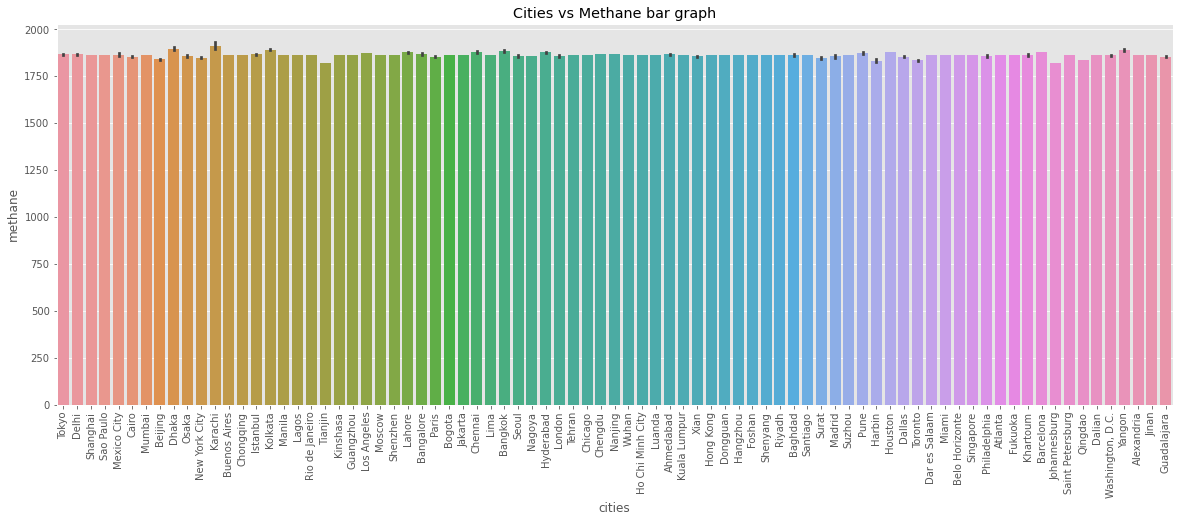

In [18]:
plt.figure(figsize=(20, 7))
sns.barplot(x='cities', y='methane', data=df)
plt.xticks(rotation=90)
plt.title('Cities vs Methane bar graph')
plt.show()

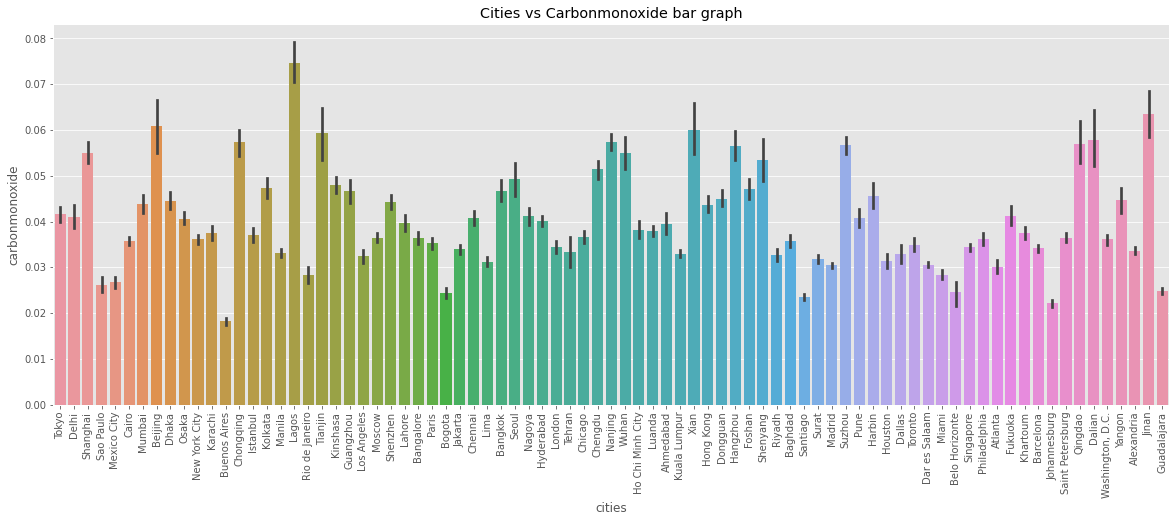

In [19]:
plt.figure(figsize=(20, 7))
sns.barplot(x='cities', y='carbonmonoxide', data=df)
plt.xticks(rotation=90)
plt.title('Cities vs Carbonmonoxide bar graph')
plt.show()

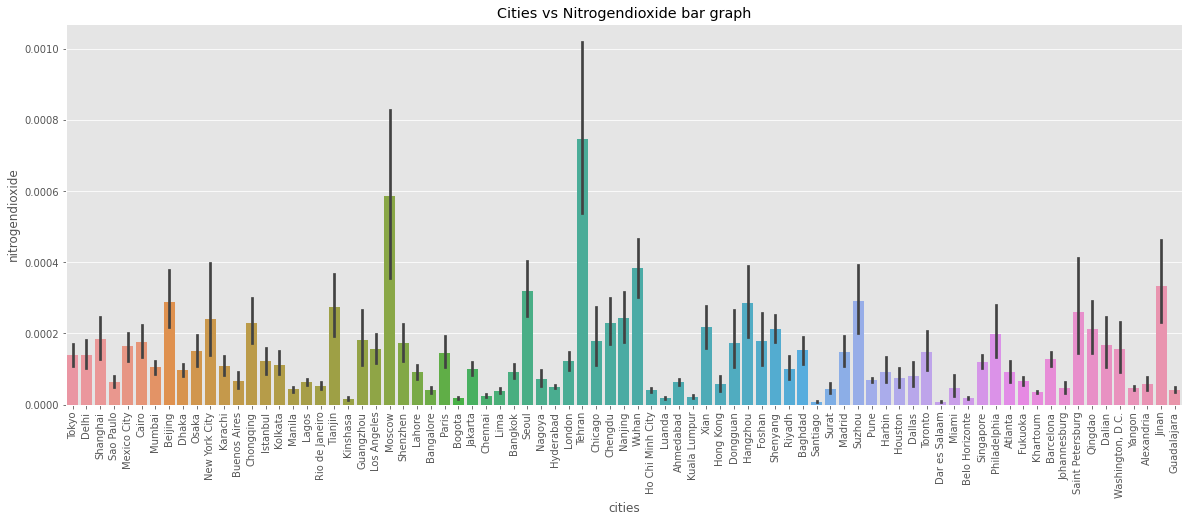

In [20]:
plt.figure(figsize=(20, 7))
sns.barplot(x='cities', y='nitrogendioxide', data=df)
plt.xticks(rotation=90)
plt.title('Cities vs Nitrogendioxide bar graph')
plt.show()

## Clustering

In [24]:
df_new = df.drop('cities', axis=1)
df_new.head()

,methane,carbonmonoxide,nitrogendioxide,city_encode
0,1878.167725,0.043529,0.000293,75
1,1867.984863,0.047945,0.000148,75
2,1866.261841,0.038836,0.000073,75
3,1865.038818,0.045252,0.000097,75
4,1871.864502,0.038625,0.000223,75


In [25]:
pca = PCA(2)
df_pca = pca.fit_transform(df_new)

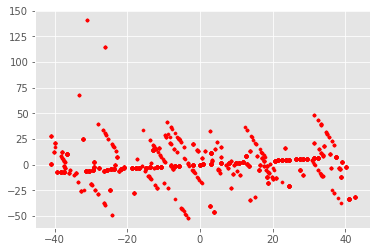

In [26]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=10, c='red')

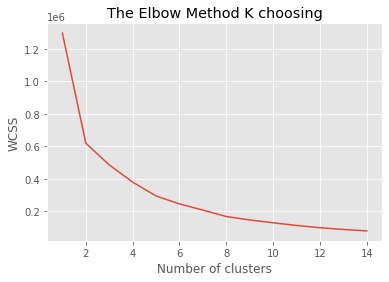

In [27]:
wcss=[]

for i in range(1,15): 
  kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method K choosing')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(df_pca)
u_labels = list(np.unique(labels))

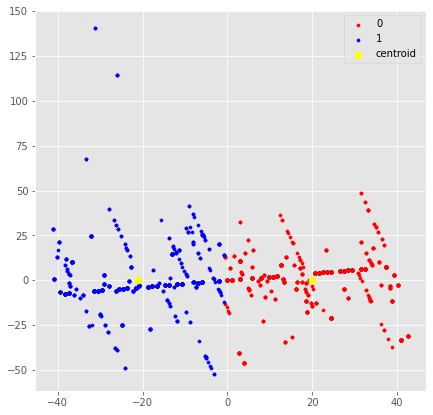

In [29]:
c_list = ['red', 'blue', 'green', 'cyan', 'magenta']
plt.figure(figsize=(7, 7))
for i in u_labels:
    plt.scatter(df_pca[labels == i , 0] , df_pca[labels == i , 1], s=10, c=c_list[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.legend(u_labels+['centroid'])
plt.show()